https://towardsdatascience.com/understanding-regression-using-covid-19-dataset-detailed-analysis-be7e319e3a50

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
import seaborn as sns

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
data = pd.read_csv("https://raw.githubusercontent.com/Ayushijain09/Regression-on-COVID-dataset/master/COVID-19_Daily_Testing.csv")
data.head()

,Date,Day,Tests,Cases,People Not-Positive - Total,People Tested - Age 0-17,People Tested - Age 18-29,People Tested - Age 30-39,People Tested - Age 40-49,People Tested - Age 50-59,People Tested - Age 60-69,People Tested - Age 70-79,People Tested - Age 80+,People Tested - Age Unknown,People Tested - Female,People Tested - Male,People Tested - Gender Unknown,People Tested - Latinx,People Tested - Asian Non-Latinx,People Tested - Black Non-Latinx,People Tested - White Non-Latinx,People Tested - Other Race Non-Latinx,People Tested - Unknown Race/Ethnicity,People Positive - Age 0-17,People Positive - Age 18-29,People Positive - Age 30-30,People Positive - Age 40-49,People Positive - Age 50-59,People Positive - Age 60-69,People Positive - Age 70-79,People Positive - Age 80+,People Positive - Age Unknown,People Positive - Female,People Positive - Male,People Positive - Gender Unknown,People Positive - Latinx,People Positive - Asian Non-Latinx,People Positive - Black Non-Latinx,People Positive - White Non-Latinx,People Positive - Other Race Non-Latinx,People Positive - Unknown Race/Ethnicity,People Not-Positive - Age 0-17,People Not-Positive - Age 18-29,People Not-Positive - Age 30-39,People Not-Positive - Age 40-49,People Not-Positive - Age 50-59,People Not-Positive - Age 60-69,People Not-Positive - Age 70-79,People Not-Positive - Age 80+,People Not-Positive - Age Unknown,People Not-Positive - Female,People Not-Positive - Male,People Not-Positive - Gender Unknown,People Not-Positive - Latinx,People Not-Positive - Asian Non-Latinx,People Not-Positive - Black Non-Latinx,People Not-Positive - White Non-Latinx,People Not-Positive - Other Race Non-Latinx,People Not-Positive - Unknown Race/Ethnicity
0,03-01-20,Sunday,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
1,05-02-20,Saturday,"2,431",705,"1,726",129,470,458,458,412,281,128,94,1,"1,238","1,158",35,569,39,376,276,73,"1,098",24,141,120,152,137,76,39,16,0,340,361,4,343,9,103,51,22,177,105,329,338,306,275,205,89,78,1,898,797,31,226,30,273,225,51,921
2,05/14/2020,Thursday,"4,098",772,"3,326",260,805,833,685,604,471,253,171,16,"2,049","1,786",263,848,55,581,510,144,"1,960",48,167,153,131,107,95,42,29,0,395,362,15,319,12,151,68,35,187,212,638,680,554,497,376,211,142,16,"1,654","1,424",248,529,43,430,442,109,"1,773"
3,03-05-20,Thursday,17,1,16,4,2,0,4,3,2,0,2,0,8,9,0,2,0,5,2,1,7,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,4,2,0,4,2,2,0,2,0,7,9,0,2,0,4,2,1,7
4,03-06-20,Friday,18,3,15,1,5,1,3,3,2,2,0,1,8,10,0,2,0,1,5,1,9,0,0,0,2,0,1,0,0,0,0,3,0,0,0,0,3,0,0,1,5,1,1,3,1,2,0,1,8,7,0,2,0,1,2,1,9


In [ ]:
data['Cases'] = data['Cases'].str.replace(',', '')
data['Tests'] = data['Tests'].str.replace(',', '')
data['Cases'] = pd.to_numeric(data['Cases'])
data['Tests'] = pd.to_numeric(data['Tests'])

In [ ]:
print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 59 columns):
 #   Column                                        Non-Null Count  Dtype 
---  ------                                        --------------  ----- 
 0   Date                                          88 non-null     object
 1   Day                                           88 non-null     object
 2   Tests                                         89 non-null     int64 
 3   Cases                                         89 non-null     int64 
 4   People Not-Positive - Total                   89 non-null     object
 5   People Tested - Age 0-17                      89 non-null     int64 
 6   People Tested - Age 18-29                     89 non-null     object
 7   People Tested - Age 30-39                     89 non-null     object
 8   People Tested - Age 40-49                     89 non-null     int64 
 9   People Tested - Age 50-59                     89 non-null     int64 
 10  Peop

In [ ]:
# # data_numeric = data.select_dtypes(include=['float64', 'int64'])
# data_numeric = data.select_dtypes(include=['float64', 'int64'])
# plt.figure(figsize=(20, 10))
# sns.pairplot(data_numeric)
# plt.show()

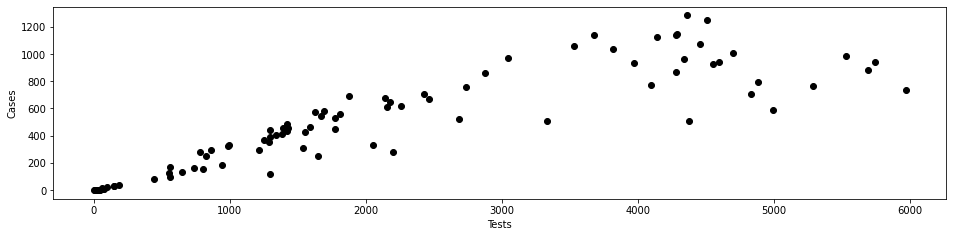

In [ ]:
plt.figure(figsize=(16, 8))
plt.scatter(
    data['Tests'],
    data['Cases'],    
    c='black'
)
plt.axis('scaled')
plt.xlabel("Tests")
plt.ylabel("Cases")
plt.show()

In [ ]:
# Scaling the dataset
X = data['Tests'].values.reshape(-1,1)
y = data['Cases'].values.reshape(-1,1)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)
reg = LinearRegression()
reg.fit(X, y)
print("The linear model is: Y = {:.5} + {:.5}X".format(reg.intercept_[0], reg.coef_[0][0]))
predictions = reg.predict(X)

The linear model is: Y = 97.777 + 0.18572X


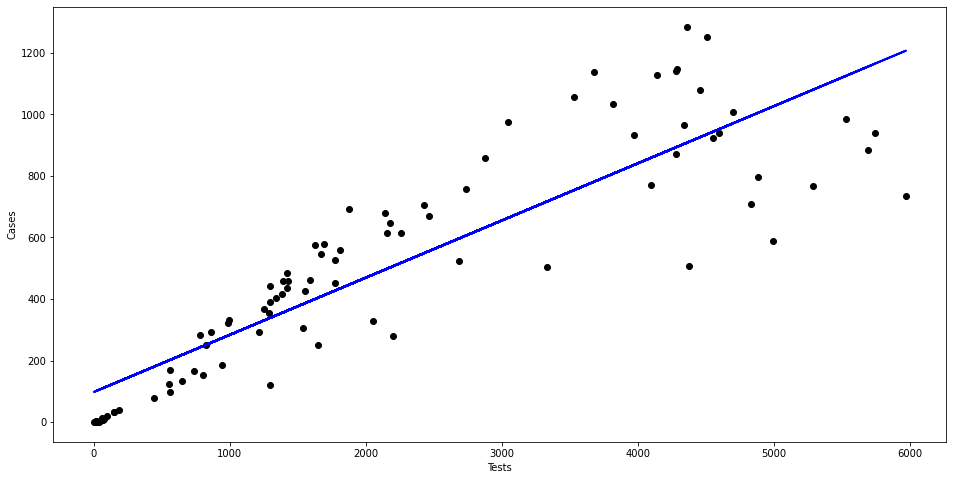

In [ ]:
actvspred = pd.DataFrame({'Actual': y.flatten(), 'Predicted': predictions.flatten()})

plt.figure(figsize=(16, 8))
plt.scatter(
    X,
    y,
    c='black'
)
plt.plot(
    X,
    predictions,
    c='blue',
    linewidth=2
)
plt.xlabel("Tests")
plt.ylabel("Cases")
plt.show()

Ridge 

In [ ]:
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from sklearn.linear_model import Ridge

In [ ]:
# alpha is metter
# ridge_reg = Ridge()
ridge_reg = Ridge(alpha=1000)
ridge_reg.fit(X, y)

Ridge(alpha=1000, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [ ]:
predictions = reg.predict(X)

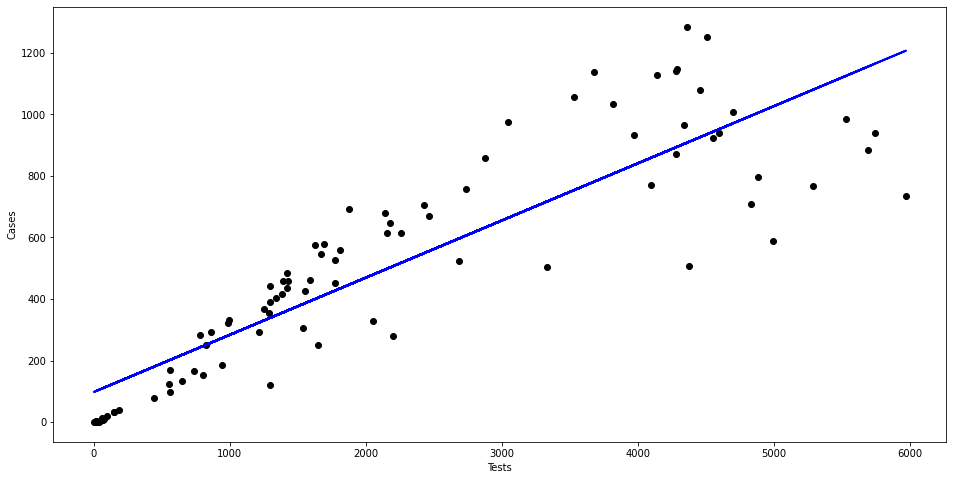

In [ ]:
plt.figure(figsize=(16, 8))
plt.scatter(
    X,
    y,
    c='black'
)
plt.plot(
    X,
    predictions,
    c='blue',
    linewidth=2
)
plt.xlabel("Tests")
plt.ylabel("Cases")
plt.show()

In [ ]:
print('RMSE for Linear Regression=>',np.sqrt(mean_squared_error(y,predictions)))

RMSE for Linear Regression=> 171.79768160540917


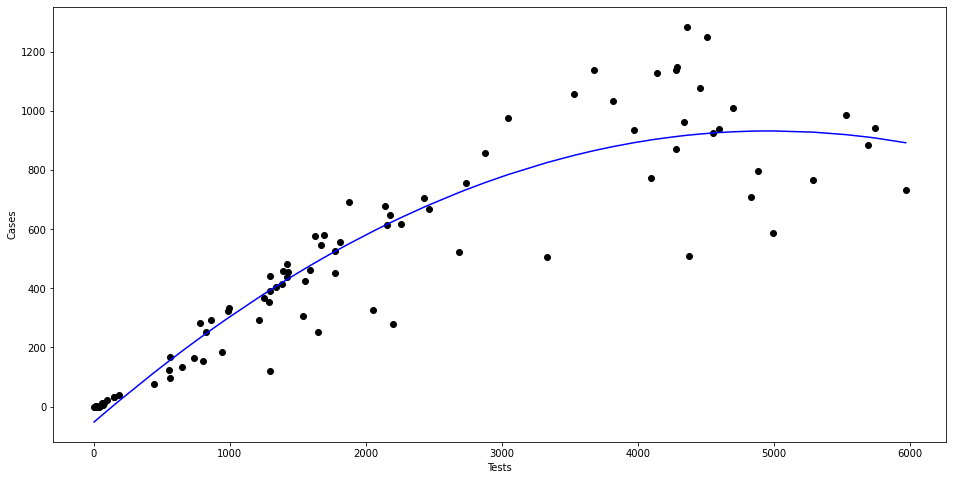

RMSE for Linear Regression=> 136.7701535452868


In [ ]:
poly = PolynomialFeatures(degree =2) 
X_poly = poly.fit_transform(X) 
  
poly.fit(X_poly, y) 
lin2 = LinearRegression() 
lin2.fit(X_poly, y) 
pred = lin2.predict(X_poly)
new_X, new_y = zip(*sorted(zip(X, pred)))

plt.figure(figsize=(16, 8))
plt.scatter(
    X,
    y,
    c='black'
)
plt.plot(
    new_X, new_y,
    c='blue'
)
plt.xlabel("Tests")
plt.ylabel("Cases")
plt.show()
print('RMSE for Linear Regression=>',np.sqrt(mean_squared_error(y,lin2.predict(poly.fit_transform(X)))))

Aditional


Alpha:0.000001, R2:0.741, MSE:21.89, RMSE:4.68
Alpha:0.000010, R2:0.741, MSE:21.89, RMSE:4.68
Alpha:0.000100, R2:0.741, MSE:21.89, RMSE:4.68
Alpha:0.001000, R2:0.741, MSE:21.90, RMSE:4.68
Alpha:0.010000, R2:0.740, MSE:21.92, RMSE:4.68
Alpha:0.100000, R2:0.732, MSE:22.66, RMSE:4.76
Alpha:0.500000, R2:0.686, MSE:26.48, RMSE:5.15
Alpha:1.000000, R2:0.635, MSE:30.81, RMSE:5.55
R2:0.662, MSE:19.55, RMSE:4.42


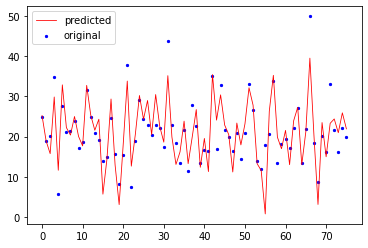

0.1
[24.69709519 24.69709471 24.69708997 24.697043   24.69661387 24.69583378
 24.73218591 24.79791671]
R2:0.675, MSE:19.93, RMSE:4.46


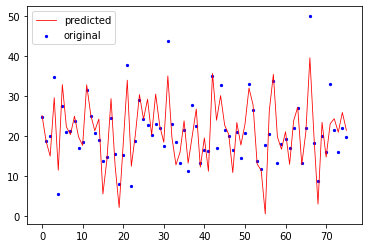

In [ ]:
from sklearn.datasets import load_boston
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

boston = load_boston()
x, y = boston.data, boston.target
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.15)

alphas = [0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1,0.5, 1]
for a in alphas:
 model = Ridge(alpha=a, normalize=True).fit(x,y) 
 score = model.score(x, y)
 pred_y = model.predict(x)
 mse = mean_squared_error(y, pred_y) 
 print("Alpha:{0:.6f}, R2:{1:.3f}, MSE:{2:.2f}, RMSE:{3:.2f}"
    .format(a, score, mse, np.sqrt(mse)))

ridge_mod=Ridge(alpha=0.01, normalize=True).fit(xtrain,ytrain)
ypred = ridge_mod.predict(xtest)
score = model.score(xtest,ytest)
mse = mean_squared_error(ytest,ypred)
print("R2:{0:.3f}, MSE:{1:.2f}, RMSE:{2:.2f}"
   .format(score, mse,np.sqrt(mse)))

x_ax = range(len(xtest))
plt.scatter(x_ax, ytest, s=5, color="blue", label="original")
plt.plot(x_ax, ypred, lw=0.8, color="red", label="predicted")
plt.legend()
plt.show()

# RidgeCV method
ridge_cv=RidgeCV(alphas=alphas, store_cv_values=True)
ridge_mod = ridge_cv.fit(xtrain,ytrain)
print(ridge_mod.alpha_)
print(np.mean(ridge_mod.cv_values_, axis=0))

ypred = ridge_mod.predict(xtest)
score = ridge_mod.score(xtest,ytest)
mse = mean_squared_error(ytest,ypred)
print("R2:{0:.3f}, MSE:{1:.2f}, RMSE:{2:.2f}"
   .format(score, mse, np.sqrt(mse)))

x_ax = range(len(xtest))
plt.scatter(x_ax, ytest, s=5, color="blue", label="original")
plt.plot(x_ax, ypred, lw=0.8, color="red", label="predicted")
plt.legend()
plt.show()